In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pyaurorax

aurorax = pyaurorax.PyAuroraX()

In [3]:
# two arrays that we'll merge into a Nx2 numpy array, representing energy and flux.
custom_spectrum_energy = [
    1.25000, 1.75000, 2.25000, 2.75000, 3.25000, 3.75000, 4.25000, 4.75000, 5.25000, 5.75000, 6.25000, 6.75000, 7.25000, 7.75000,
    8.25000, 8.75000, 9.25000, 9.75000, 10.2500, 10.7616, 11.3058, 11.8854, 12.4948, 13.1354, 13.8089, 14.5169, 15.2612, 16.0436,
    16.8662, 17.7310, 18.6401, 19.5957, 20.6004, 21.6566, 22.7670, 23.9343, 25.1614, 26.4515, 27.8077, 29.2334, 30.7322, 32.3079,
    33.9644, 35.7058, 37.5365, 39.4610, 41.4842, 43.6111, 45.8471, 48.1978, 50.6689, 53.2668, 55.9978, 58.8689, 61.8871, 65.0602,
    68.3959, 71.9026, 75.5891, 79.4647, 83.5389, 87.8221, 92.3248, 97.0584, 102.035, 107.266, 112.766, 118.547, 124.625, 131.015,
    137.732, 144.794, 152.218, 160.022, 168.227, 176.852, 185.919, 195.452, 205.473, 216.007, 227.082, 238.725, 250.965, 263.832,
    277.359, 291.579, 306.529, 322.245, 338.767, 356.136, 374.395, 393.591, 413.771, 434.985, 457.288, 480.733, 505.381, 531.292,
    558.532, 587.169, 617.274, 648.922, 682.193, 717.170, 753.940, 792.595, 833.232, 875.953, 920.864, 968.078, 1017.71, 1069.89,
    1124.75, 1182.41, 1243.04, 1306.77, 1373.77, 1444.20, 1518.25, 1596.09, 1677.92, 1763.95, 1854.39, 1949.47, 2049.42, 2154.50,
    2264.96, 2381.09, 2503.17, 2631.51, 2766.43, 2908.27, 3057.38, 3214.13, 3378.93, 3552.17, 3734.29, 3925.75, 4127.03, 4338.63,
    4561.07, 4794.92, 5040.76, 5299.21, 5570.91, 5856.53, 6156.80, 6472.47, 6804.32, 7153.18, 7519.93, 7905.49, 8310.81, 8736.92,
    9184.87, 9655.7
]
custom_spectrum_flux = [
    14237.8, 19932.9, 25628.1, 31323.2, 37018.3, 42713.4, 48408.6, 54103.7, 59798.8, 65493.9, 71189.1, 76884.2, 82579.3, 88274.4,
    93969.6, 99664.7, 105360.0, 111055.0, 116750.0, 122577.0, 128775.0, 135378.0, 142319.0, 149616.0, 157287.0, 165351.0, 173829.0,
    182741.0, 192110.0, 201960.0, 212315.0, 223200.0, 234644.0, 246675.0, 259322.0, 272618.0, 286595.0, 301289.0, 316737.0, 332976.0,
    350048.0, 367995.0, 386863.0, 406698.0, 427550.0, 449471.0, 472515.0, 496742.0, 522210.0, 548985.0, 577132.0, 606722.0, 637829.0,
    670531.0, 704910.0, 741052.0, 779046.0, 818989.0, 860979.0, 905122.0, 951529.0, 1.00032e+06, 1.05160e+06, 1.10552e+06,
    1.14681e+06, 1.16681e+06, 1.18332e+06, 1.19597e+06, 1.20452e+06, 1.21134e+06, 1.21518e+06, 1.21786e+06, 1.21958e+06, 1.22031e+06,
    1.21912e+06, 1.21596e+06, 1.21029e+06, 1.20159e+06, 1.18984e+06, 1.17542e+06, 1.15883e+06, 1.14056e+06, 1.12111e+06, 1.10084e+06,
    1.07960e+06, 1.05717e+06, 1.03333e+06, 1.00787e+06, 980597.0, 951507.0, 920731.0, 888359.0, 854453.0, 819049.0, 782220.0,
    744214.0, 705369.0, 665934.0, 626276.0, 586707.0, 547469.0, 508787.0, 470923.0, 434073.0, 398475.0, 364314.0, 331712.0, 300753.0,
    271519.0, 244145.0, 218704.0, 195202.0, 173623.0, 153886.0, 135967.0, 119819.0, 105375.0, 92493.0, 81018.5, 70809.4, 61716.9,
    53608.8, 46394.7, 40017.3, 34425.8, 29569.1, 25398.0, 21855.1, 18852.0, 16295.5, 14096.6, 12167.9, 10429.6, 8852.41, 7439.90,
    6196.57, 5126.73, 4235.10, 3517.08, 2944.53, 2486.98, 2115.25, 1801.38, 1520.12, 1263.38, 1033.71, 833.682, 665.821, 532.604,
    433.682, 362.035, 310.022, 270.400, 236.311, 201.652, 165.385
]
custom_spectrum_arr = np.empty((len(custom_spectrum_energy), 2), dtype=np.float64)
custom_spectrum_arr[:, 0] = np.asarray(custom_spectrum_energy)[:]
custom_spectrum_arr[:, 1] = np.asarray(custom_spectrum_flux)[:]

In [4]:
# set parameters
timestamp = datetime.datetime(2021, 11, 4, 6, 0, 0)
latitude = 58.227808
longitude = -103.680631

# set output
output = pyaurorax.models.ATMForwardOutputFlags()
output.altitudes = True
output.plasma_electron_density = True

# perform the calculation
result = aurorax.models.atm.forward(timestamp, latitude, longitude, output)

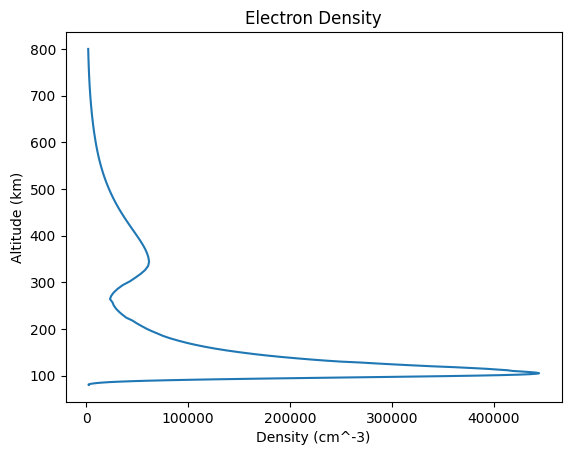

In [5]:
# plot the electron density data
plt.title("Electron Density")
plt.xlabel("Density (cm^-3)")
plt.ylabel("Altitude (km)")
plt.plot(result.plasma_electron_density, result.altitudes)
plt.show()

In [6]:
result.pretty_print()

ATMForwardResult:
  altitudes                            : array([ 80. ,  81. ,  82. ,  83. ,  84. ,  85. ,  86. ,  87. ...])
  emission_1304                        : None
  emission_1356                        : None
  emission_4278                        : None
  emission_5577                        : None
  emission_6300                        : None
  emission_8446                        : None
  emission_lbh                         : None
  height_integrated_rayleighs_1304     : None
  height_integrated_rayleighs_1356     : None
  height_integrated_rayleighs_4278     : None
  height_integrated_rayleighs_5577     : None
  height_integrated_rayleighs_6300     : None
  height_integrated_rayleighs_8446     : None
  height_integrated_rayleighs_lbh      : None
  neutral_n2_density                   : None
  neutral_n_density                    : None
  neutral_o2_density                   : None
  neutral_o_density                    : None
  neutral_temperature                  : None
